# Data Preprocessing

This part is to check for missing values and the type of each column

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# import data
NCDB = pd.read_csv("/content/drive/My Drive/NCDB_2014.csv")
#NCDB = pd.read_csv("NCDB_2014.csv")
df = NCDB.copy()
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2014,1,1,10,2,1,02,03,1,3,2,18,1,01,UUUU,01,M,75,11,2,NN,1
1,2014,1,1,12,2,1,04,UU,1,5,1,UU,1,01,UUUU,01,F,21,11,2,02,1
2,2014,1,1,00,2,1,03,UU,7,3,1,UU,1,01,UUUU,01,F,34,11,2,02,1
3,2014,1,1,17,2,2,21,UU,1,1,1,18,1,01,UUUU,01,F,50,11,2,02,1
4,2014,1,1,17,2,2,21,UU,1,1,1,18,2,01,UUUU,01,M,63,11,1,NN,1


In [ ]:
# replace unrelated strings with nan in order to easily drop
import numpy as np
droplist = ["U","X","UU","XX","NN","NNNN","UUUU","XXXX","N"]
for value in droplist:
  df.replace(value, np.nan,inplace=True)

In [ ]:
# check for new data
df.head()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

# Visualization

In [ ]:
# check for each column
df.C_YEAR.unique()
# have only one value, can drop

array([2014])

In [ ]:
df.C_MNTH.unique() 
# [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, '12']
# '12' and 12 are different because of data type
df.C_MNTH = df.C_MNTH.astype(str)
df.C_MNTH.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype=object)

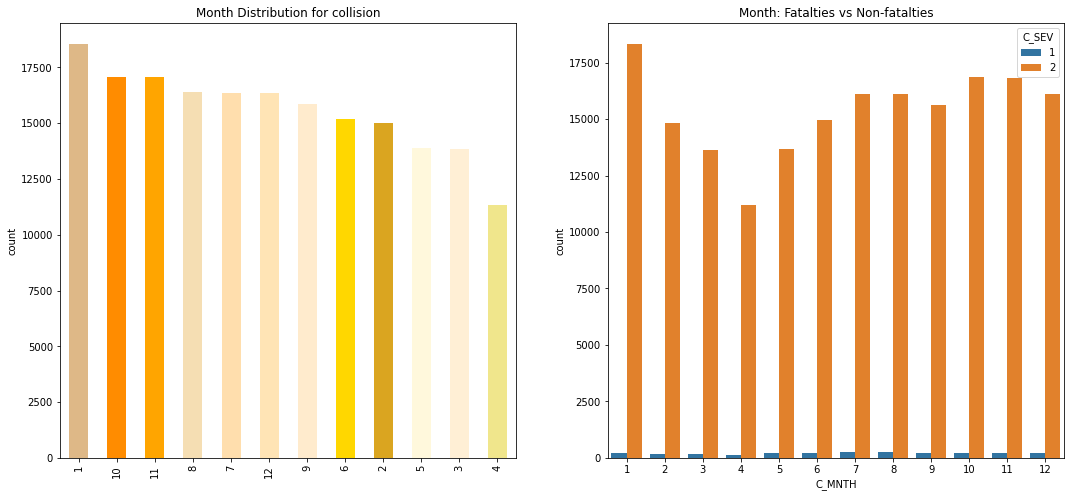

In [ ]:
# C_MNTH
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_MNTH'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Month Distribution for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_MNTH',hue='C_SEV',ax=ax[1])
ax[1].set_title('Month: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_WDAY.unique()
#[1, 2, 3, 4, 5, 6, 7, '6', '7']
df.C_WDAY = df.C_WDAY.astype(str)
df.C_WDAY.unique()

array(['1', '2', '3', '4', '5', '6', '7'], dtype=object)

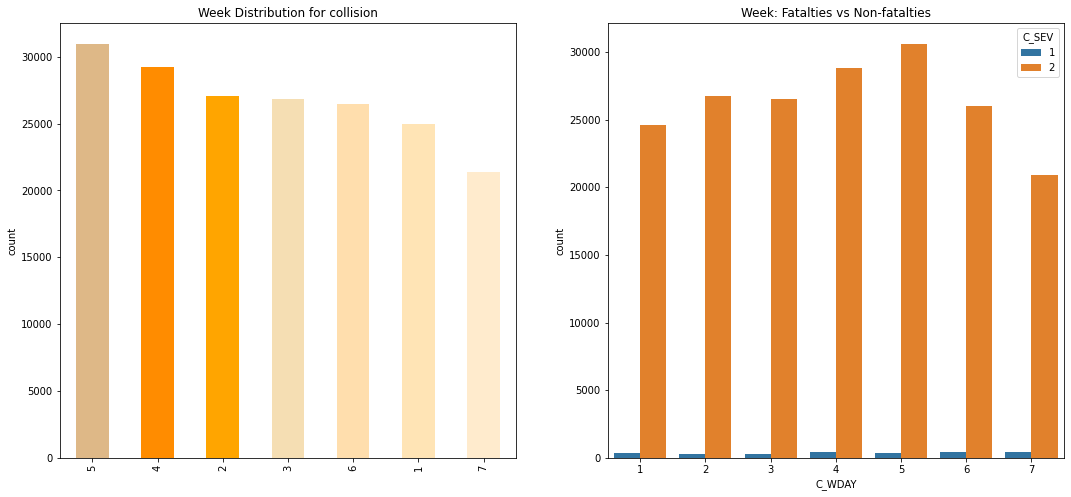

In [ ]:
# C_WDAY
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond']
df['C_WDAY'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Week Distribution for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_WDAY',hue='C_SEV',ax=ax[1])
ax[1].set_title('Week: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_HOUR.unique()

array(['22', '19', '10', '14', '11', '15', '12', '00', '18', '20', '17',
       '06', '13', '07', '16', '04', '08', '09', '23', '21', '05', '03',
       '02', '01'], dtype=object)

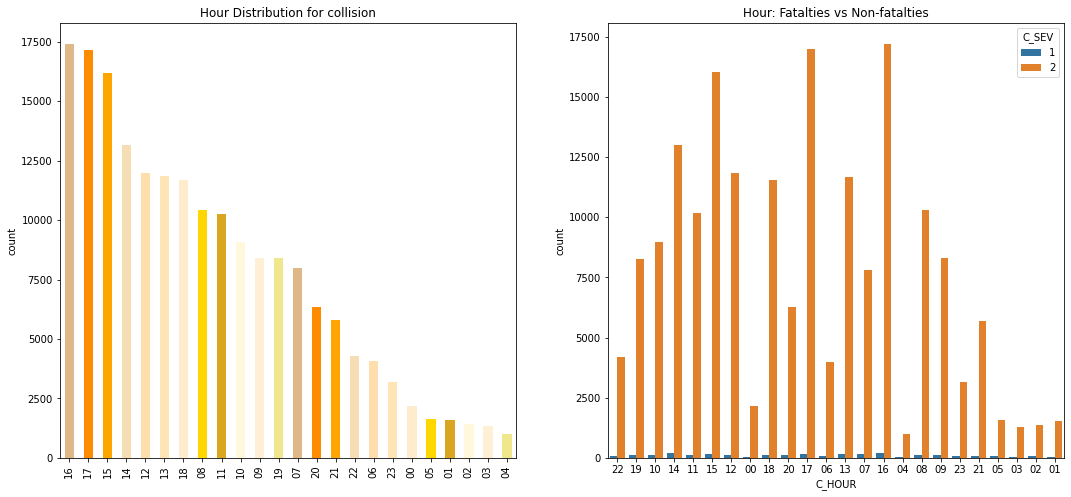

In [ ]:
# C_HOUR
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_HOUR'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Hour Distribution for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_HOUR',hue='C_SEV',ax=ax[1])
ax[1].set_title('Hour: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_SEV.unique()
for i in range(len(df.C_SEV)):
  if df.C_SEV[i] == 2:
    df.C_SEV[i] = 0
df.C_SEV.unique()

#import numpy as np
#np.mean(df['C_SEV'])
#0.01415369467617738

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([0, 1])

In [ ]:
df.C_VEHS.unique()
#[1, 2, 3, 4, 6, 5, 9, 11, 51, 10, 7, 22, 21, 14, 13, 15, 57, 8, 17, 43, 20, 36, 37, 18, 12, 16, '02', '01', '04', '03', '05', '06','07', '09', 26]
df.C_VEHS = pd.to_numeric(df.C_VEHS)
for i in range(len(df.C_VEHS)):
  if df.C_VEHS[i] > 4:
    df.C_VEHS[i] = 4
df.C_VEHS = df.C_VEHS.astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


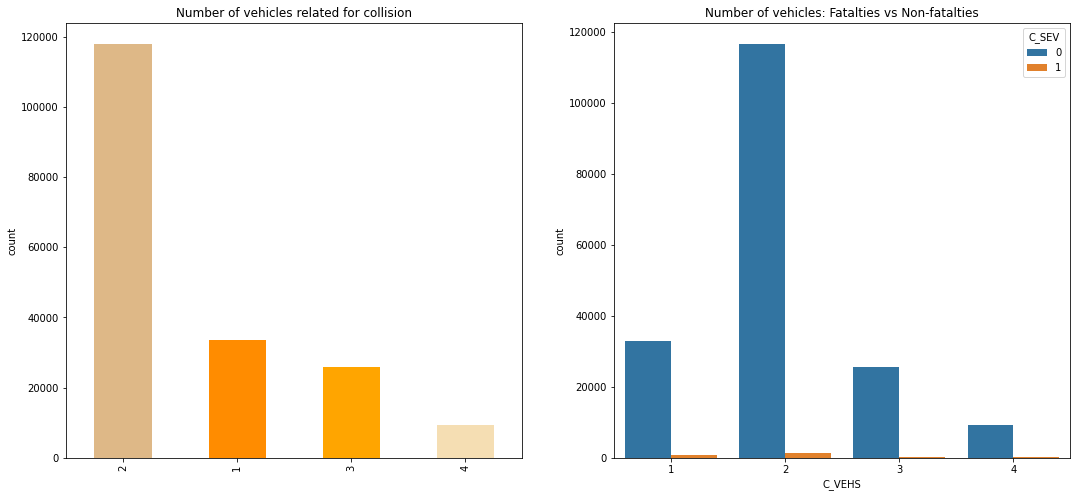

In [ ]:
# C_VEHS
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_VEHS'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Number of vehicles related for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_VEHS',hue='C_SEV',ax=ax[1])
ax[1].set_title('Number of vehicles: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_CONF.unique()

array(['03', '41', '35', '04', '21', '33', '31', '23', '05', '32', '02',
       '24', '34', 'QQ', '22', '06', '36', '25', '01'], dtype=object)

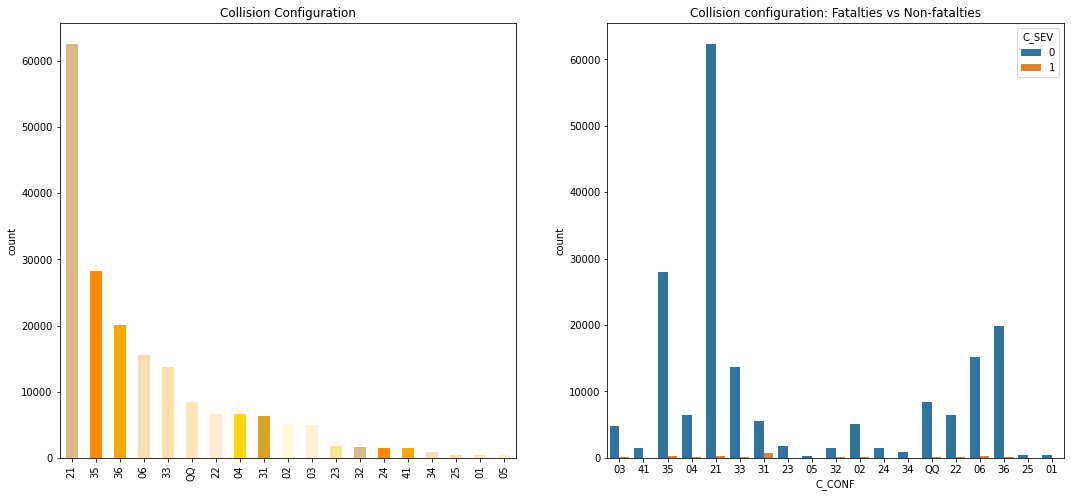

In [ ]:
# C_CONF
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_CONF'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Collision Configuration')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_CONF',hue='C_SEV',ax=ax[1])
ax[1].set_title('Collision configuration: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_RCFG.unique()

array(['03', '02', '01', 'QQ', '05', '04', '09', '06', '08', '10', '07'],
      dtype=object)

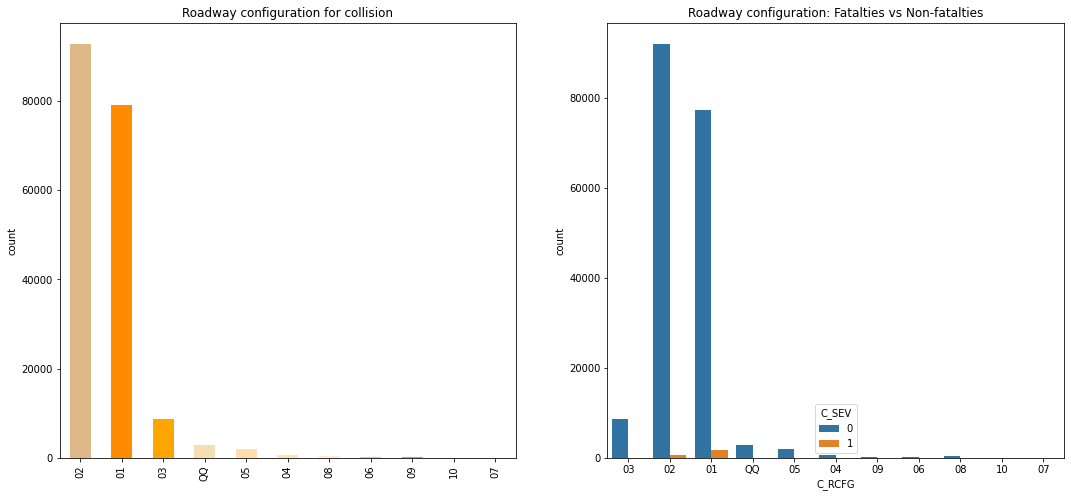

In [ ]:
# C_RCFG
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_RCFG'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Roadway configuration for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_RCFG',hue='C_SEV',ax=ax[1])
ax[1].set_title('Roadway configuration: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_WTHR.unique()

array(['5', '1', '2', '4', '3', '7', '6', 'Q'], dtype=object)

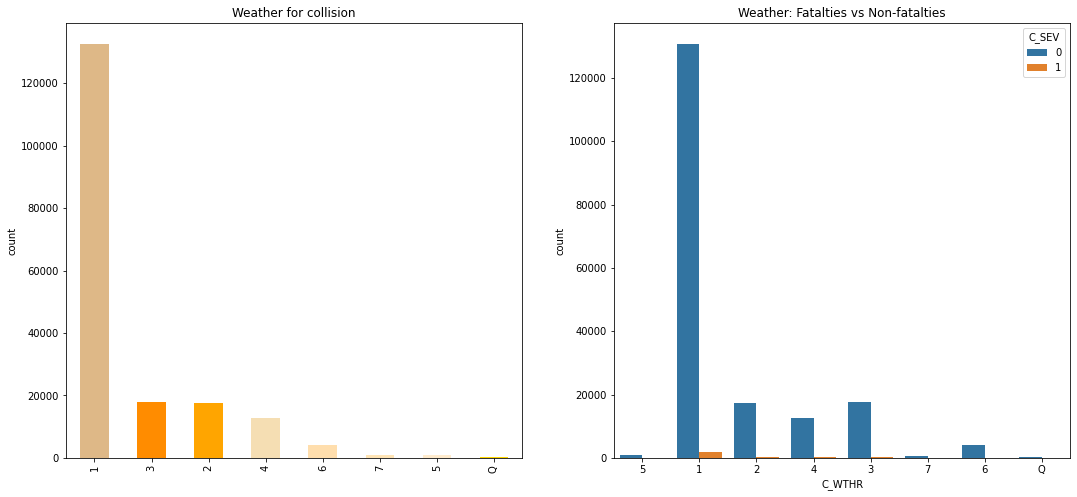

In [ ]:
# C_WTHR
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_WTHR'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Weather for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_WTHR',hue='C_SEV',ax=ax[1])
ax[1].set_title('Weather: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_RSUR.unique()

array(['5', '3', '2', '9', '1', '4', '6', 'Q', '7', '8'], dtype=object)

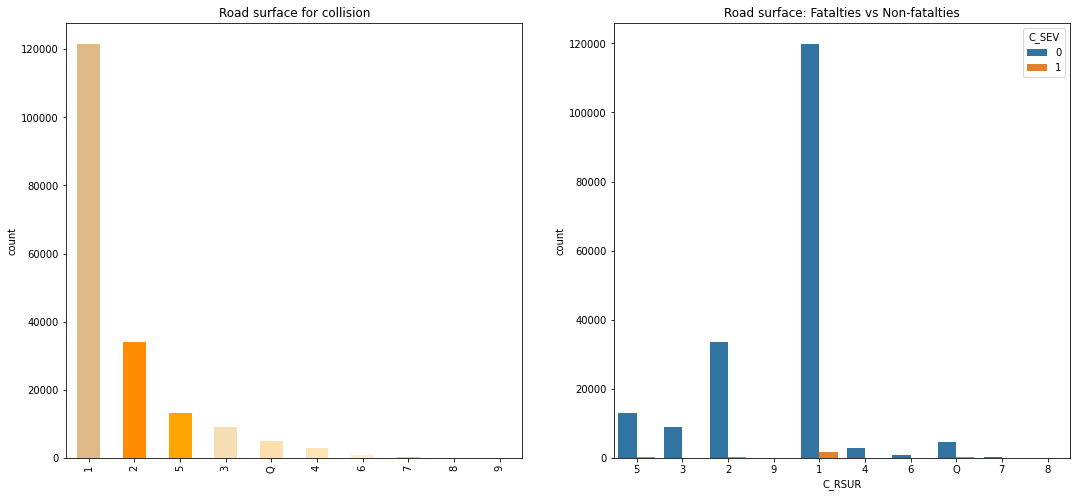

In [ ]:
# C_RSUR
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_RSUR'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Road surface for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_RSUR',hue='C_SEV',ax=ax[1])
ax[1].set_title('Road surface: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_RALN.unique()

array(['5', '1', '2', '4', '3', '6', 'Q'], dtype=object)

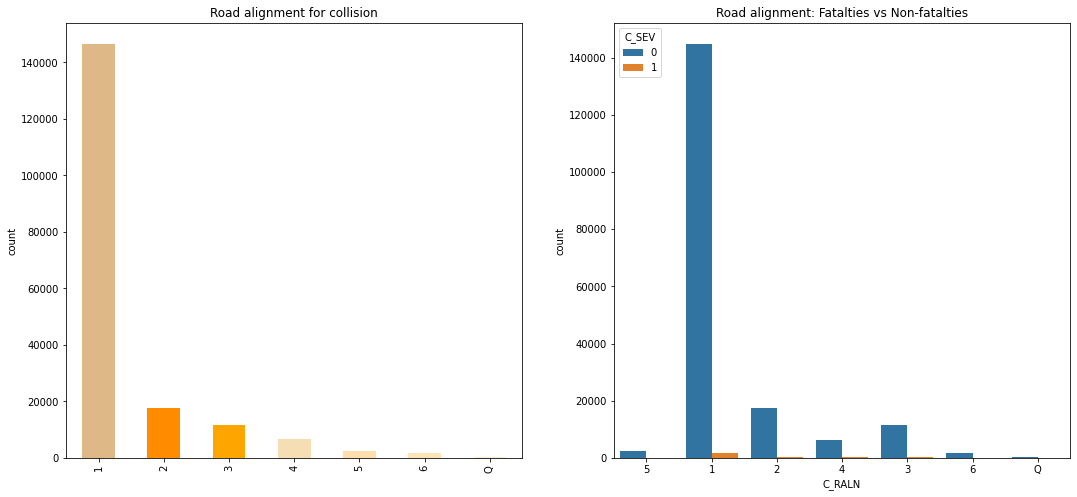

In [ ]:
# C_RALN
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_RALN'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Road alignment for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_RALN',hue='C_SEV',ax=ax[1])
ax[1].set_title('Road alignment: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.C_TRAF.unique()

array(['18', '03', '12', '01', '15', '04', 'QQ', '02', '08', '11', '07',
       '06', '10', '16', '13', '17', '05', '09'], dtype=object)

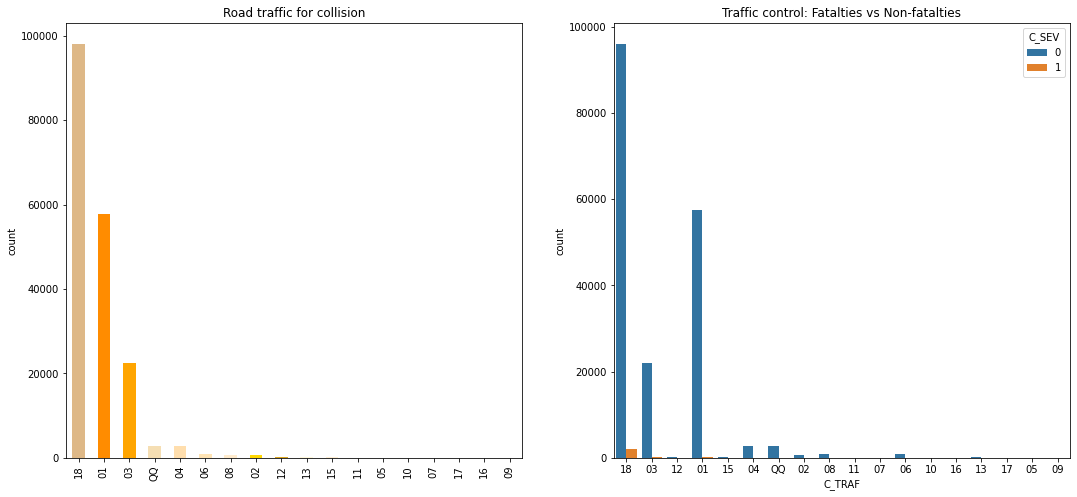

In [ ]:
# C_TRAF
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['C_TRAF'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Road traffic for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='C_TRAF',hue='C_SEV',ax=ax[1])
ax[1].set_title('Traffic control: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.V_ID.unique()
df.V_ID = pd.to_numeric(df.V_ID).astype(str)
df.V_ID.unique()
# unique number to identify vehicle, can drop

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '37', '38', '39', '40', '42', '43', '44', '45', '46', '47', '51',
       '52', '35', '36'], dtype=object)

In [ ]:
df.V_TYPE.unique()

array(['01', '08', '05', '07', '06', '11', '09', '14', '10', '17', '21',
       '23', '18'], dtype=object)

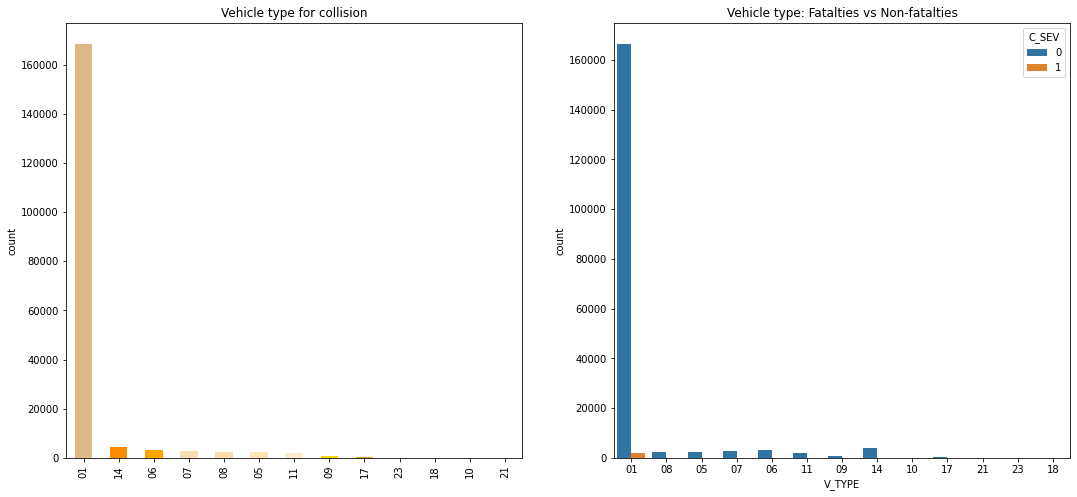

In [ ]:
# V_TYPE
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['burlywood','darkorange','orange','wheat','navajowhite','moccasin','blanchedalmond','gold','goldenrod','cornsilk','papayawhip','khaki']
df['V_TYPE'].value_counts().plot.bar(color=colors,ax=ax[0])
ax[0].set_title('Vehicle type for collision')
ax[0].set_ylabel('count')
sns.countplot(data=df,x='V_TYPE',hue='C_SEV',ax=ax[1])
ax[1].set_title('Vehicle type: Fatalties vs Non-fatalties')
ax[1].set_ylabel('count');

In [ ]:
df.V_YEAR.unique()
df.V_YEAR = pd.to_numeric(df.V_YEAR)
df.V_YEAR.unique()

array([2008, 2007, 2006, 2014, 1987, 2012, 2000, 1994, 2003, 2011, 2004,
       2005, 2009, 2013, 1998, 2001, 2002, 1999, 2010, 1996, 1989, 1997,
       1995, 1991, 1993, 1992, 1984, 1988, 1990, 1986, 1985, 1982, 1973,
       1979, 1983, 1978, 1981, 1969, 1976, 1968, 1980, 1974, 2015, 1951,
       1975, 1977, 1970, 1963, 1967, 1972, 1971, 1956, 1962, 1957, 1911,
       1915, 1929, 1966, 1960, 1954, 1930, 1952, 1965, 1927, 1961, 1958,
       1959, 1916])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'percentage')

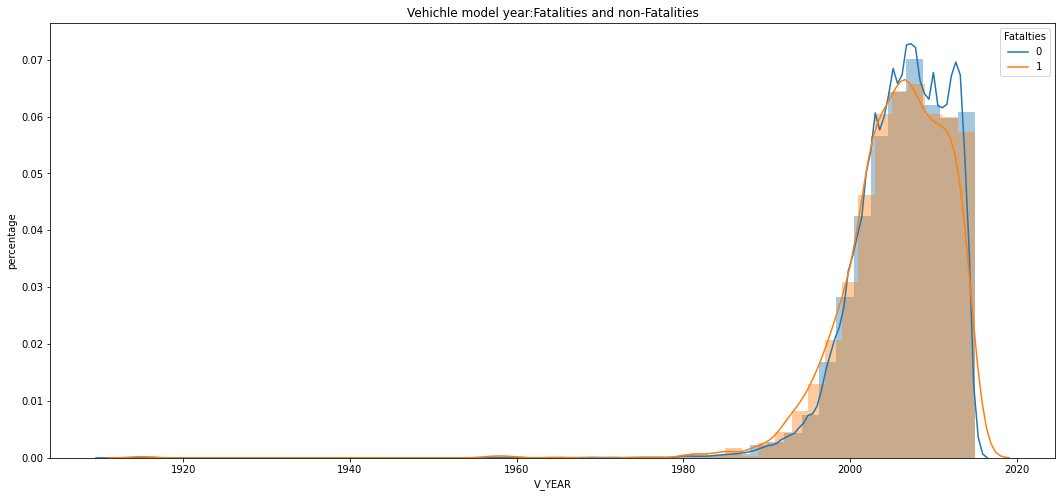

In [ ]:
# Vehicle model year - group
Non_Fatalties = df[df['C_SEV']==0]
Fatalties = df[df['C_SEV']==1]

plt.subplots(figsize=(18,8))
sns.distplot(Non_Fatalties['V_YEAR'])
sns.distplot(Fatalties['V_YEAR'])
plt.title('Vehichle model year:Fatalities and non-Fatalities')
plt.legend([0,1],title='Fatalties')
plt.ylabel('percentage')

# From visualization, we can see that this variable is not significant because for the two situations, the distributions are almost the same.

In [ ]:
df.P_ID.unique()
# unique number to indenty person, can drop

array(['01', '02', '03', '04', '06', '07', '05', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '26', '27', '28', '29', '30', '31', '24', '25', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93'], dtype=object)

In [ ]:
df.P_SEX.unique()

array(['M', 'F'], dtype=object)

In [ ]:
df.P_AGE.unique()
df.P_AGE = pd.to_numeric(df.P_AGE)
df.P_AGE.unique()

array([19, 22, 33, 37, 35, 56, 58, 30, 25, 54, 31, 36, 48, 24, 39,  2, 40,
       27, 41, 16, 20, 51, 43, 38, 34, 23, 49, 28, 50, 74, 52, 57, 61, 84,
       66,  4, 32, 68, 26, 21, 59, 46, 42, 72, 44,  1, 63,  7, 71, 65, 55,
       83, 29, 45, 69, 62,  8, 47,  9, 53, 17, 18, 14, 82, 80, 64, 78, 77,
       87, 15, 75, 88, 10, 13, 67, 12, 73, 70, 81, 60, 79, 76,  6, 11,  3,
        5, 89, 86, 85, 96, 90, 93, 92, 91, 94, 99, 97, 98, 95])

In [ ]:
df.P_PSN.unique()

array(['11', '13', '12', '21', '96', '23', '22', '32', '33', '97', '31',
       '98', 'QQ'], dtype=object)

In [ ]:
df.P_ISEV.unique()

array(['2', '1', '3'], dtype=object)

In [ ]:
df.P_SAFE.unique()

array(['02', '01', '13', 'QQ', '12', '09'], dtype=object)

In [ ]:
df.P_USER.unique()

array(['1', '2', '5', '4'], dtype=object)

In [ ]:
# export the cleaned file for visualization
# df.to_csv("cleaned_NCDB.csv")

There are two major concerns for the problem:


1.   Considering the collision level and vehicle situation, whether the accident will cause fatalties?
2.   Considering personal safety, whether the accident will cause fatalties?



# Logistic Regression

In [ ]:
# deal with categorical variables
df_c = df.copy()
df_c = pd.get_dummies(df_c, columns = ['C_MNTH','C_WDAY','C_HOUR','C_RCFG','C_WTHR','C_RSUR','C_RALN','C_TRAF','V_TYPE'])
# df_c.head()

# sample data so as to be balanced 
df1 = df_c[df_c.C_SEV == 1] # 2645
df2 = df_c[df_c.C_SEV == 0].sample(n = 2645, replace = False, random_state = 2020)
dfc = pd.concat([df1, df2], ignore_index=True)
# dfc

# define X and y
# to analyse the relationship between fatalties and collision level and vehicle situation
y = dfc['C_SEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER'])]]

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


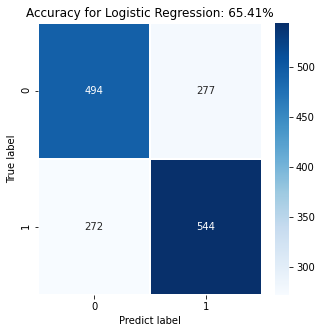

In [ ]:
lr_classifier = linear_model.LogisticRegression(random_state=2020)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# plot confusion matrix 
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Logistic Regression: {accuracy_score(y_test, y_pred)*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

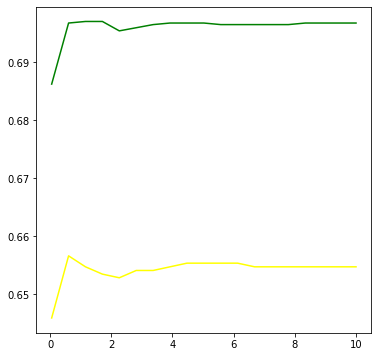

In [ ]:
# optimization
accuracy_score1 = []
accuracy_score2 = []
for i in np.linspace(0.05, 10, 19):
    lr = linear_model.LogisticRegression(penalty="l2", solver = "liblinear", C = i, max_iter=1000)    
    lr = lr.fit(X_train, y_train)
    accuracy_score1.append(accuracy_score(lr.predict(X_train), y_train))
    accuracy_score2.append(accuracy_score(lr.predict(X_test),y_test))
 
graph = [accuracy_score1, accuracy_score2]
color = ["green","yellow"]
label = ["Train","Test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,10, 19),graph[i], color[i], label = label[i])
plt.show()

## from the picture, we can see that c = 0.6 may be the best value

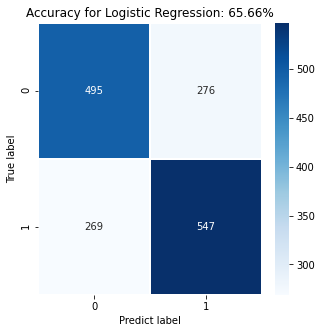

In [ ]:
lr_classifier = linear_model.LogisticRegression(C=0.6,random_state=2020)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Logistic Regression: {accuracy_score(y_test, y_pred)*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

In [ ]:
# real 1 predicted as 0 is more series

# Decision Tree

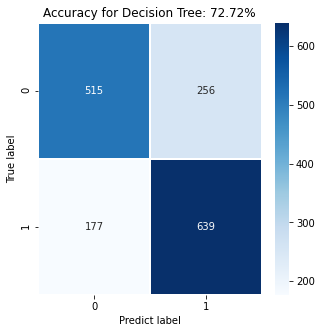

In [ ]:
y = dfc['C_SEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER'])]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

# build the model
dt_classifier = tree.DecisionTreeClassifier(random_state=2020)
dt_classifier = dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# plot confusion matrix
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Decision Tree: {accuracy_score(y_test, y_pred)*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

In [ ]:
#tree.plot_tree(dt_classifier) 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

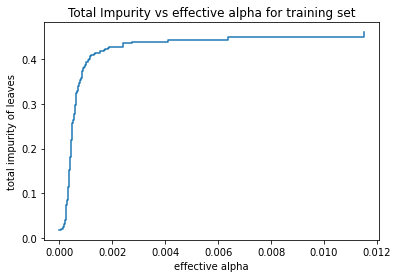

In [ ]:
# return the effective alphas and the corresponding total leaf impurities at each step of the pruning process
clf=dt_classifier
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

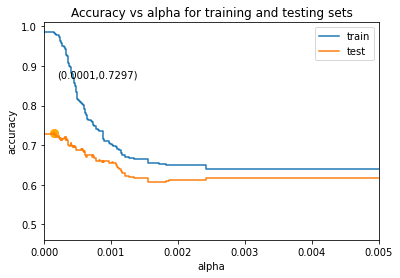

Optimal ccp_alpha for decision tree is: 0.00014402736519938784, with highest accuracy: 72.97%


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=2020, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
#print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# find the optimal ccp_alpha value for highest accuracy
max_index = test_scores.index(max(test_scores))
optimal_ccp_alpha = ccp_alphas[max_index]

# plot the accuracy for each ccp_alpha value
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
plt.plot(optimal_ccp_alpha,max(test_scores),marker="o",markersize=8, color="orange")
ax.plot(ccp_alphas, train_scores, label="train", drawstyle="steps-post")
point = (f"({optimal_ccp_alpha:.4f},{max(test_scores):.4f})")
ax.annotate(point, xytext = (0.0002,0.8), xy=(optimal_ccp_alpha,max(test_scores)))
ax.plot(ccp_alphas, test_scores, label="test", drawstyle="steps-post")
ax.legend()
plt.xlim(0,0.005)
plt.show()


print(f"Optimal ccp_alpha for decision tree is: {optimal_ccp_alpha}, with highest accuracy: {max(test_scores)*100:.2f}%")

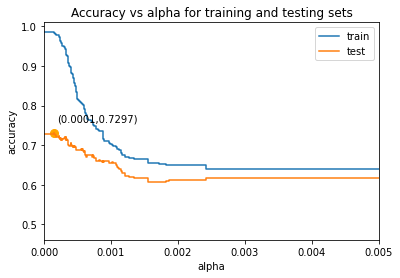

In [ ]:
# plot the accuracy for each ccp_alpha value
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
plt.plot(optimal_ccp_alpha,max(test_scores),marker="o",markersize=8, color="orange")
ax.plot(ccp_alphas, train_scores, label="train", drawstyle="steps-post")
point = (f"({optimal_ccp_alpha:.4f},{max(test_scores):.4f})")
ax.annotate(point, xytext = (0.0002,0.76), xy=(optimal_ccp_alpha,max(test_scores)))
ax.plot(ccp_alphas, test_scores, label="test", drawstyle="steps-post")
ax.legend()
plt.xlim(0,0.005)
plt.show()

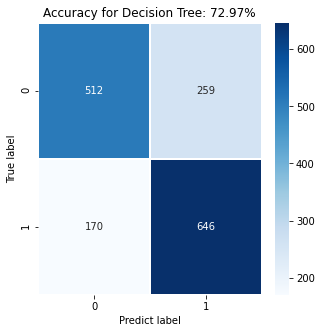

In [ ]:
# build the model
dt_classifier = tree.DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha,random_state=2020)
dt_classifier = dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# plot confusion matrix
dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Decision Tree: {accuracy_score(y_test, y_pred)*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

In [ ]:
### generate feature importance through decision tree
def select_dt(imp_num):
  clf = tree.DecisionTreeClassifier(random_state=2020, ccp_alpha=optimal_ccp_alpha)
  clf = clf.fit(X_train, y_train)
  dt_fea_imp = pd.DataFrame({'col':list(X_train.columns),
                             'imp':clf.feature_importances_})
  dt_fea_imp = dt_fea_imp.sort_values('imp',ascending=False).reset_index(drop=True).iloc[:imp_num,:]
  dt_select_col = list(dt_fea_imp.col)

  return dt_select_col

imp_num = 20

print(f"Top {imp_num} most important features selected from decision tree:")
print(select_dt(imp_num))

Top 20 most important features selected from decision tree:
['C_TRAF_01', 'C_MNTH_5', 'C_RCFG_01', 'V_TYPE_01', 'C_WDAY_5', 'C_RALN_1', 'C_WDAY_2', 'C_HOUR_15', 'C_MNTH_11', 'C_MNTH_12', 'C_WDAY_1', 'C_MNTH_10', 'C_MNTH_7', 'C_MNTH_8', 'C_HOUR_16', 'C_MNTH_6', 'C_RSUR_2', 'C_HOUR_08', 'C_HOUR_13', 'C_WDAY_7']


# Random Forest


In [ ]:
y = dfc['C_SEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER'])]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)

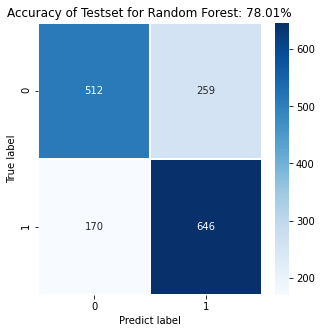

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=2020)
rf.fit(X_train, y_train)
# prediction
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)

# print confusion matrix and accuracy for train and testset
#print(cm_train)
accuracy_train = (cm_train[0,0] + cm_train[1,1]) / sum(sum(cm_train))
#print(f"Accuracy of Trainset for Random Forest: {accuracy_train*100:.2f}%")

cm_test = confusion_matrix(y_test,y_pred)
accuracy_test = (cm_test[0,0] + cm_test[1,1]) / sum(sum(cm_test))
#print(cm_test)
#print(f"Accuracy of Testset for Random Forest: {accuracy_test*100:.2f}%")

# plot confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy of Testset for Random Forest: {accuracy_test*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

In [ ]:
### generate feature importance through random forest
def select_rf(imp_num):
  rf = RandomForestClassifier(n_estimators=100,random_state=2020)
  rf = rf.fit(X_train, y_train)
  rf_fea_imp = pd.DataFrame({'col':list(X_train.columns),
                            'imp':rf.feature_importances_})
  rf_fea_imp = rf_fea_imp.sort_values('imp',ascending=False).reset_index(drop=True).iloc[:imp_num,:]
  rf_select_col = list(rf_fea_imp.col)

  return rf_select_col

imp_num = 20

print(f"Top {imp_num} most important features selected from random forest:")
print(select_rf(imp_num))

Top 20 most important features selected from random forest:
['C_TRAF_18', 'C_TRAF_01', 'C_RCFG_01', 'V_TYPE_01', 'C_WDAY_5', 'C_WDAY_4', 'C_RALN_1', 'C_WDAY_1', 'C_RCFG_02', 'C_HOUR_16', 'C_HOUR_15', 'C_MNTH_5', 'C_HOUR_13', 'C_WDAY_6', 'C_HOUR_17', 'C_WTHR_1', 'C_MNTH_9', 'C_WDAY_7', 'C_MNTH_7', 'C_WDAY_3']


# Neural Network

In [ ]:
# create model
# use one hidden layer with 10 neurons
# set dependent and independent variables
y = dfc['C_SEV']
X = dfc[dfc.columns[~dfc.columns.isin(['C_YEAR','C_SEV','C_VEHS','C_CONF','V_ID','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER'])]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)
model = Sequential()
model.add(Dense(10, input_dim=110, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


Epoch 1/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6826 - accuracy: 0.5747
Epoch 2/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6628 - accuracy: 0.6176
Epoch 3/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6527 - accuracy: 0.6241
Epoch 4/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6391 - accuracy: 0.6416
Epoch 5/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6386 - accuracy: 0.6419
Epoch 6/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6328 - accuracy: 0.6395
Epoch 7/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6360 - accuracy: 0.6500
Epoch 8/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6230 - accuracy: 0.6605
Epoch 9/100
3703/3703 [==============================] - 4s 1ms/step - loss: 0.6214 - accuracy: 0.6711
Epoch 10/100
3703/3703 [==============================] - 4s 1ms/step - l

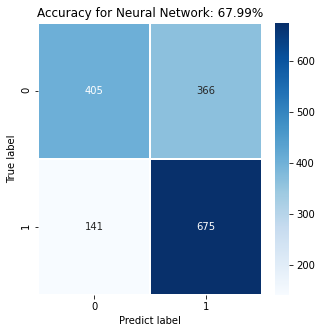

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
# set different values from epochs and batch_size to see the changes in accuracy
model.fit(X_train, y_train, epochs=100, batch_size=1)
# evaluate the model
scores = model.evaluate(X_test, y_test)
print(scores)
print("Keras: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X_test)
#print(predictions)
#print('predictions shape:', predictions.shape)

y_pred = (predictions > 0.38)
y_pred=y_pred*1 #convert to 0,1 instead of True False
matrix = confusion_matrix(y_test, y_pred)
#print(matrix)

# plot confustion_matrix
plt.figure(figsize=(5,5))
sns.heatmap(matrix, annot=True, linewidth=0.5, fmt='.0f', cmap='Blues')
plt.title(f'Accuracy for Neural Network: {scores[1]*100:.2f}%')
plt.xlabel('Predict label')
plt.ylabel('True label')
plt.show()

# Conclusion